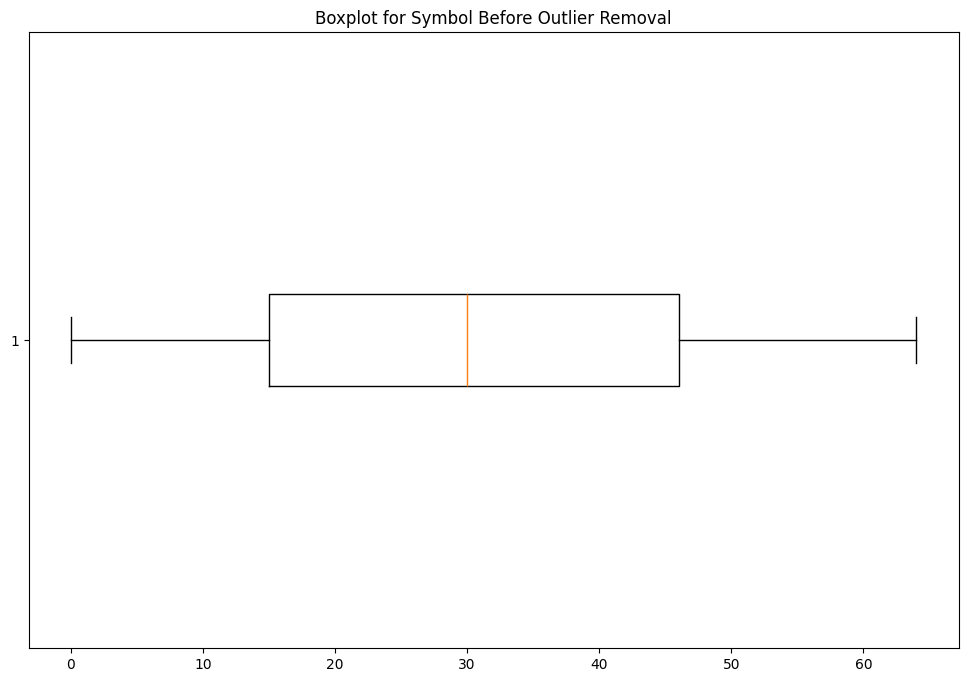

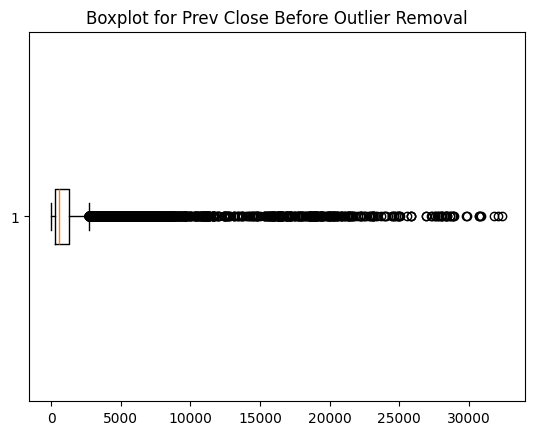

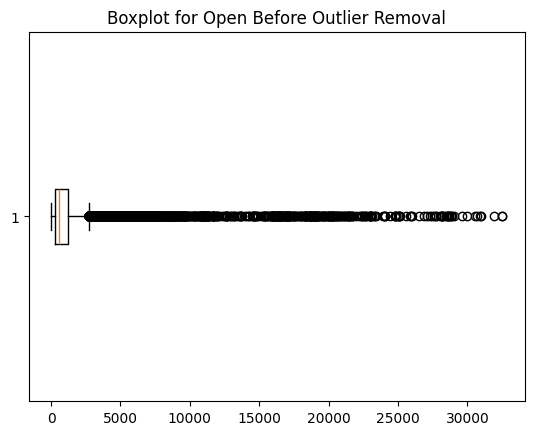

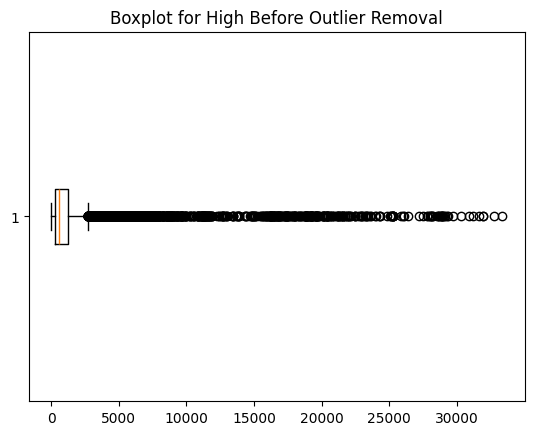

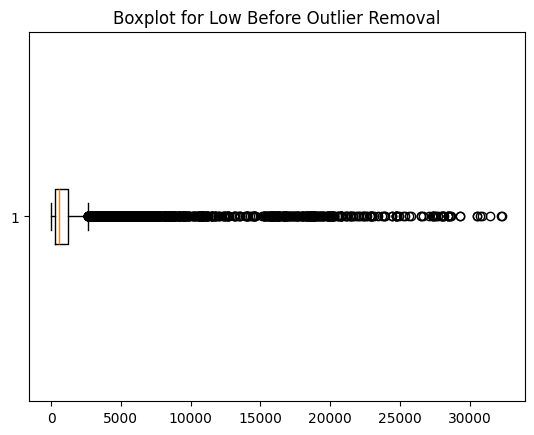

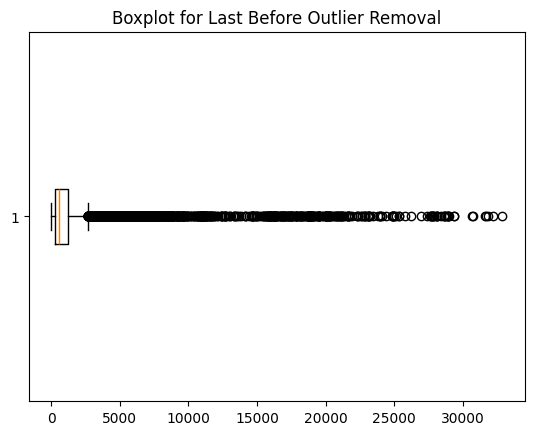

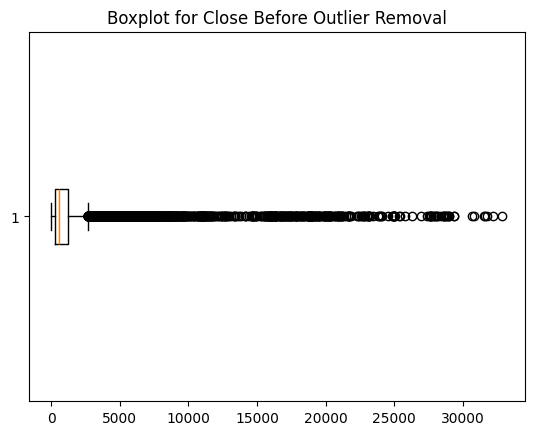

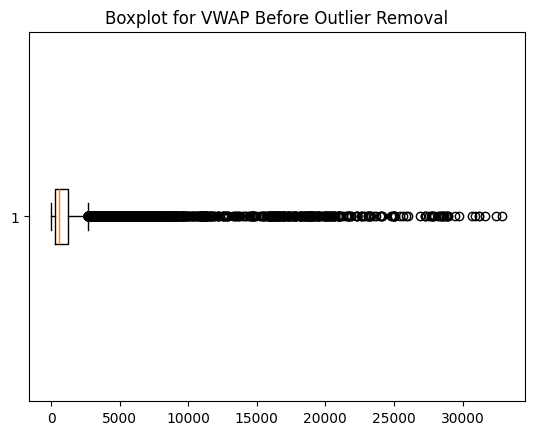

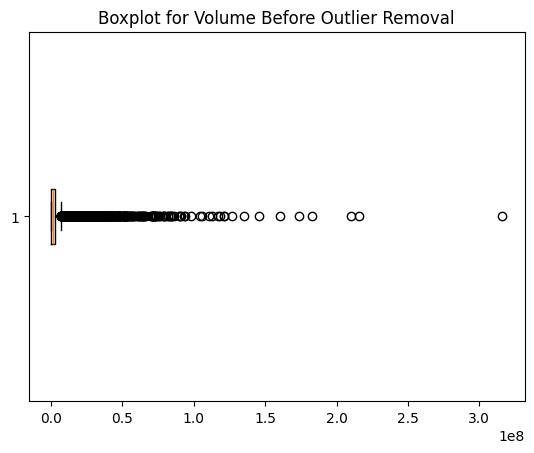

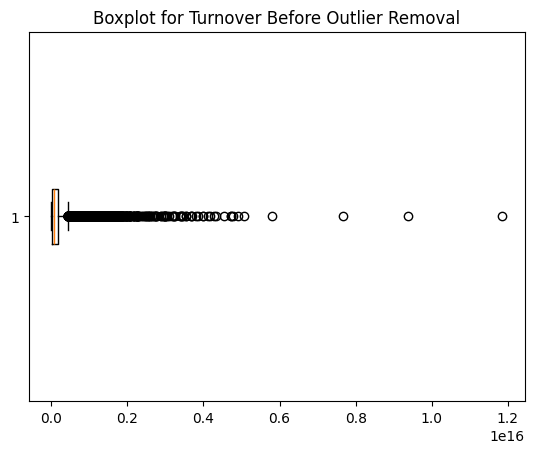

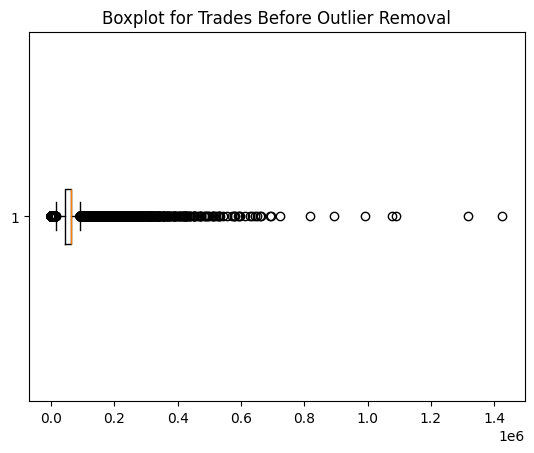

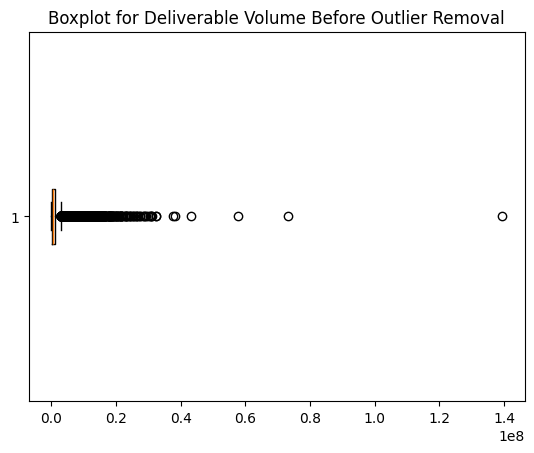

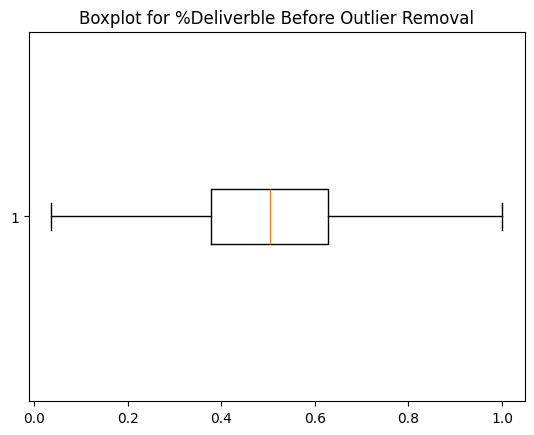

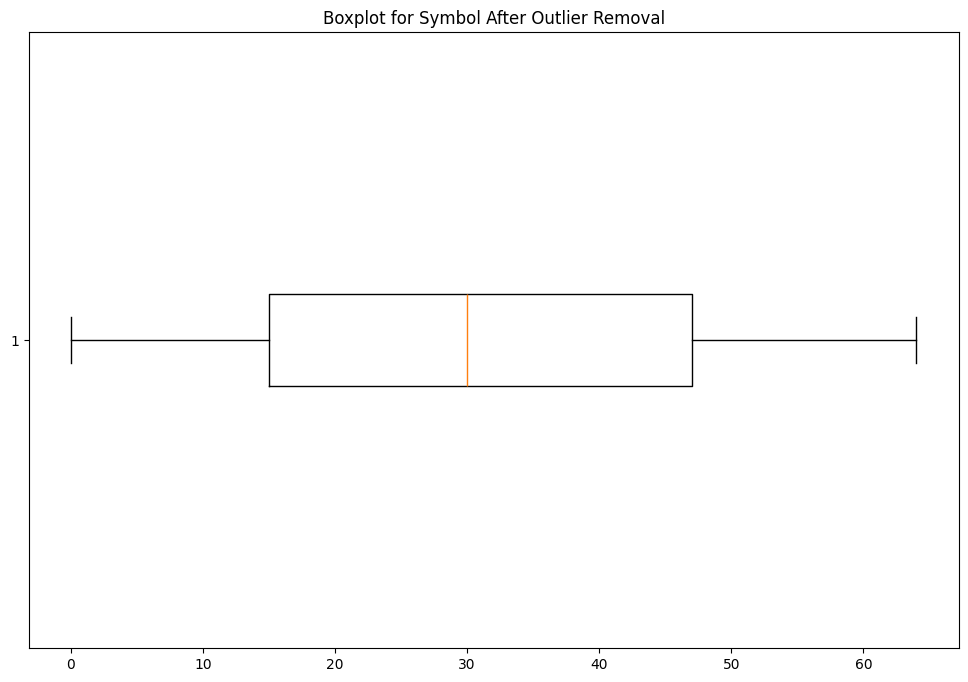

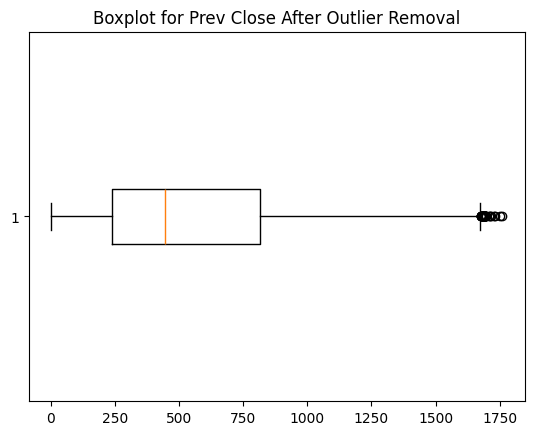

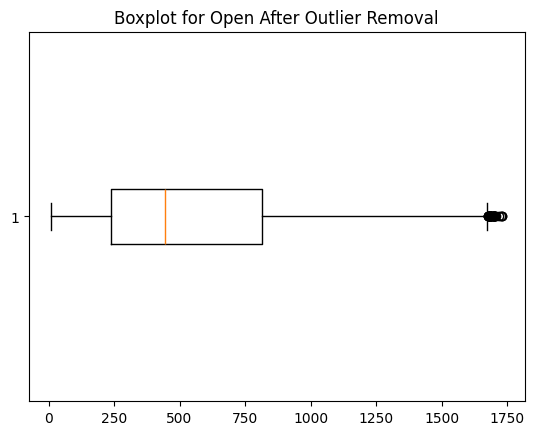

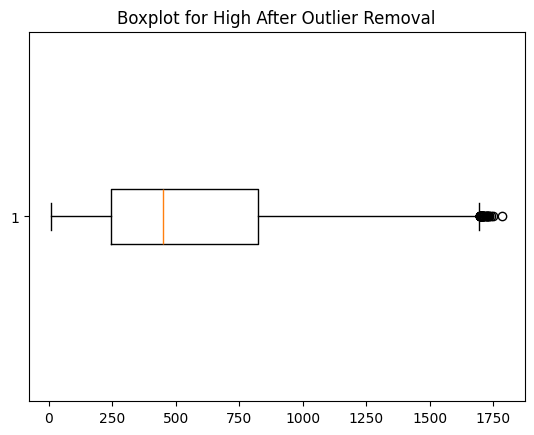

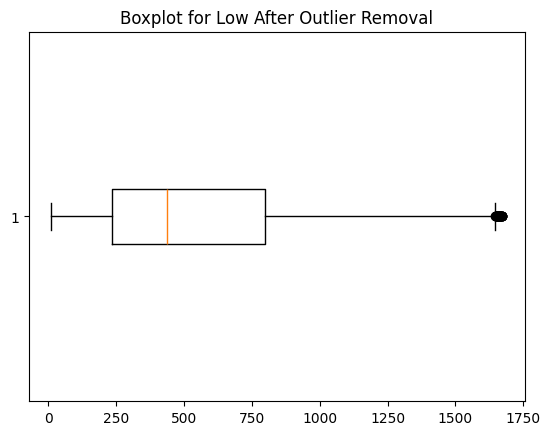

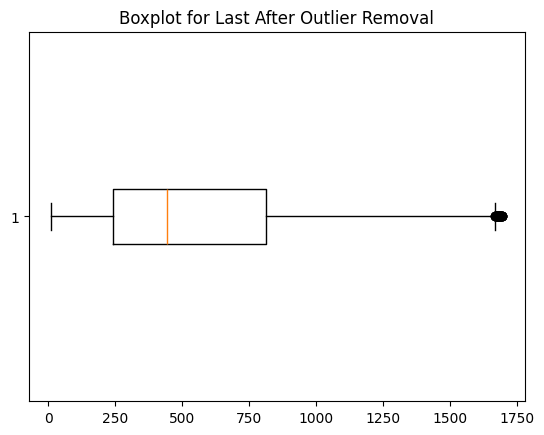

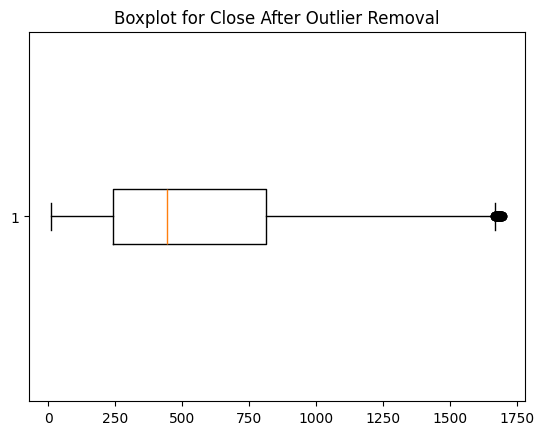

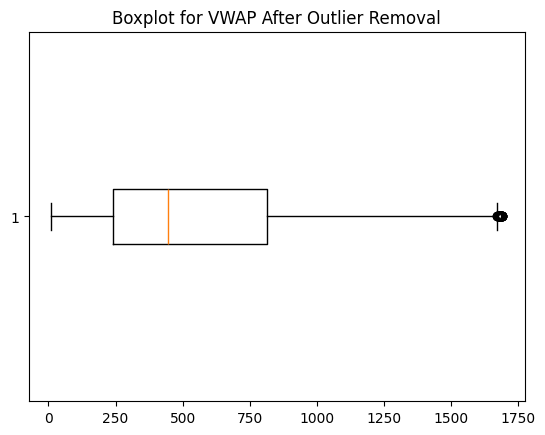

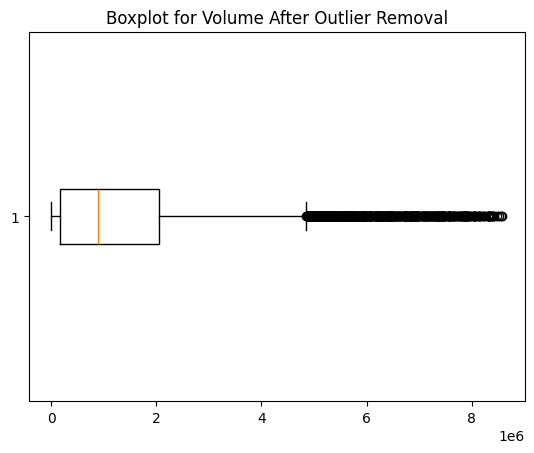

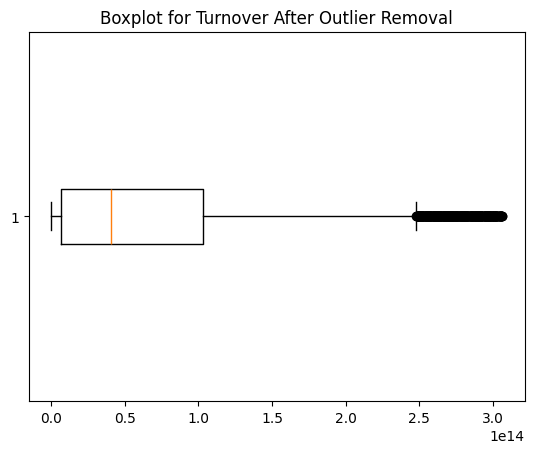

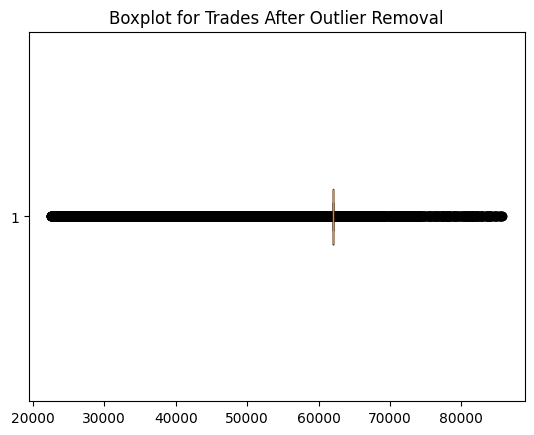

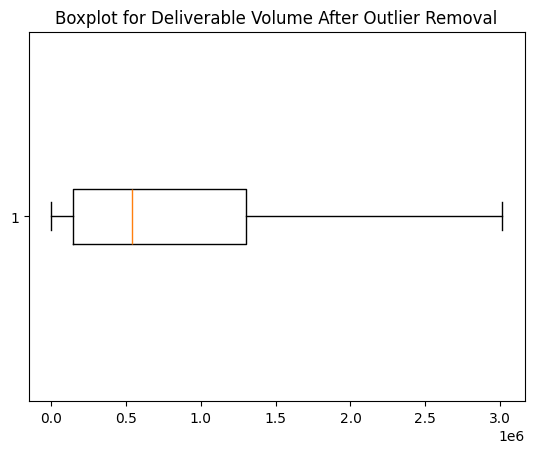

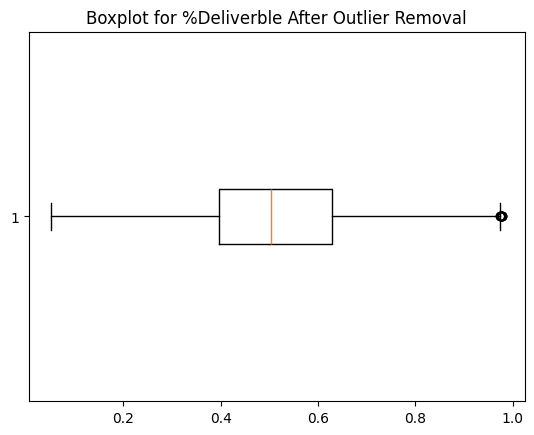

Accuracy (R-squared score): 99.9307020614408 %


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\vinit\Downloads\nf_all\NF_ALL.csv")
data = data.drop('Series', axis=1)


data = data.sample(frac=0.1, random_state=42)


mean_trades = data['Trades'].mean()
mean_deliverable_volume = data['Deliverable Volume'].mean()
mean_percent_deliverable = data['%Deliverble'].mean()


data['Trades'].fillna(mean_trades, inplace=True)
data['Deliverable Volume'].fillna(mean_deliverable_volume, inplace=True)
data['%Deliverble'].fillna(mean_percent_deliverable, inplace=True)


non_numeric_columns = ['Date'] 
data = data.drop(non_numeric_columns, axis=1, errors='ignore') 


encoder = LabelEncoder()


categorical_columns = ['Symbol']  
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])


plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.boxplot(data[column], vert=False)
    plt.title(f'Boxplot for {column} Before Outlier Removal')
    plt.show()

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data.drop(data[(data[column] < lower_bound) | (data[column] > upper_bound)].index, inplace=True)


for column in data.columns:
    remove_outliers_iqr(data, column)

plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.boxplot(data[column], vert=False)
    plt.title(f'Boxplot for {column} After Outlier Removal')
    plt.show()


X = data.drop('Turnover', axis=1)  
y = data['Turnover'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)


accuracy_percentage = r2 * 100

print("Accuracy (R-squared score):", accuracy_percentage, "%")
